**Regression analysis of Bike Sharing dataset**

---




## Data

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)



# EDA

## Imports

In [1]:
%matplotlib inline

import pandas as pd
!pip3 install pandas_profiling --upgrade
import pandas_profiling

import numpy as np
import os
import random
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

import missingno as msno
!pip install robustats
import robustats
from pathlib import Path

from scipy import stats

plt.rcParams['figure.figsize'] = 10, 7
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pandas_profiling
  

<ipython-input-1-f2d55c72959e>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for robustats: filename=robustats-0.1.7-cp39-cp39-linux_x86_64.whl size=38040 sha256=5bf052819485c89d1c4b1566f69aeecc3027a9b54f48a4b6b35f44f0db2f5618
  Stored in directory: /root/.cache/pip/wheels/b7/5a/96/7d68e0a33d5c75070fd35492b4893cef78e16431e9f52e8c1d
Successfully built robustats


In [2]:
!pip3 install yellowbrick --upgrade
from yellowbrick.regressor import ResidualsPlot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### sklearn

In [3]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,\
    cross_validate, train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingClassifier
from sklearn.svm import SVR

from sklearn.preprocessing import FunctionTransformer, MinMaxScaler,\
    PolynomialFeatures, PowerTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
#from yellowbrick.regressor import PredictionError
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.decomposition import PCA


from sklearn.manifold import TSNE

In [4]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [5]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00


## Read data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Myoth13/datasets/main/hour.csv', index_col='instant', parse_dates=['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

We can see here that we have no obvious data missing and data types are alright

In [7]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Everything looks fine for now



## Uniqness constrains

Let's check for duplicate rows:

In [8]:
df.duplicated().sum()

0

We have no duplicated values 

## Useless data and constans

Let's check for useless fields:

In [9]:
(df.nunique()/len(df)).sort_values(ascending=False)

cnt           0.050003
registered    0.044652
dteday        0.042062
casual        0.018528
hum           0.005121
atemp         0.003740
temp          0.002877
windspeed     0.001726
hr            0.001381
mnth          0.000690
weekday       0.000403
season        0.000230
weathersit    0.000230
yr            0.000115
holiday       0.000115
workingday    0.000115
dtype: float64

We have no unique fields, let's check for constants - fields with zero variance:

In [10]:
df.var().sort_values(ascending=True)[0:5]

windspeed    0.014967
holiday      0.027944
atemp        0.029532
temp         0.037078
hum          0.037222
dtype: float64

We can see here that we don't have zero variance fields which means we don't have constans

## Data range constrains

Let's see the overall statistics:

In [11]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataset looks too good to be true =)))

## Profile report

In [12]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file('profile.html')
display(profile)

Output hidden; open in https://colab.research.google.com to view.

Everything looks fine, just vars `hum` and `windspeed` probably will have better shapes after transformation.

## Target variables

Many algorithms assume that we deal with normally distributed data which is not true IRL. Let's look at the distribution of the target variables:

### cnt

count of total rental bikes including both casual and registered

Text(0.5, 1.0, 'Distribution of the target variable - cnt')

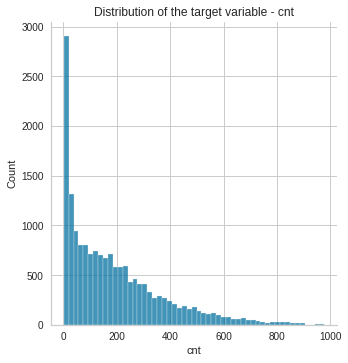

In [13]:
sns.displot(data=df, x='cnt')
plt.title('Distribution of the target variable - cnt')
plt.show()

We can see that out target variable doesn't have normal distribution. Let's see how the log transformation will look like

Text(0.5, 1.0, 'Distribution of the target variable - cnt after box-cox transf.')

Text(0.5, 8.95999999999999, 'cnt')

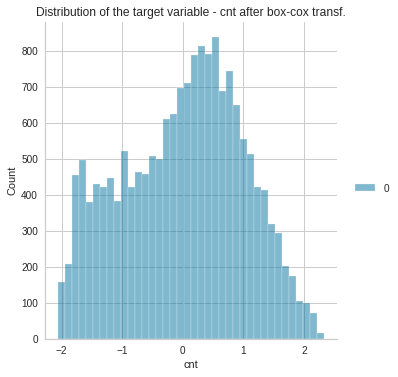

In [14]:
sns.displot(PowerTransformer(method='box-cox').fit_transform(df.cnt.values.reshape(-1,1)))
plt.title('Distribution of the target variable - cnt after box-cox transf.')
plt.xlabel('cnt')
plt.show()

After transformation variable looks much better, will transform it after train/test split.

### casual

count of casual users

Text(0.5, 1.0, 'Distribution of the target variable - casual')

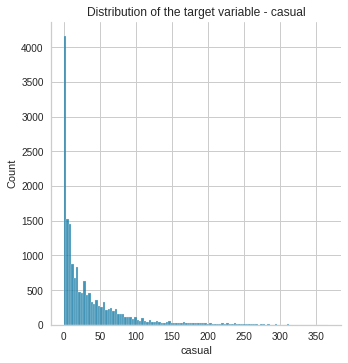

In [15]:
sns.displot(data=df, x='casual')
plt.title('Distribution of the target variable - casual')
plt.show()

Let's see if the transformation will work as well as before, but now we can't use box-cox

Text(0.5, 1.0, 'Distribution of the target variable - casual after yeo-johnson transf.')

Text(0.5, 8.95999999999999, 'casual')

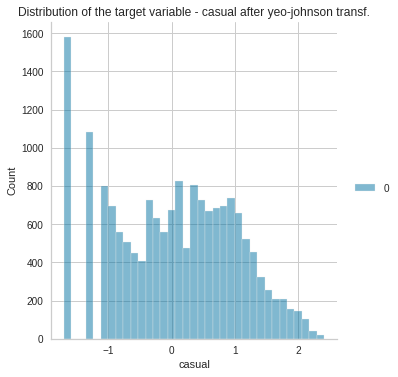

In [16]:
sns.displot(PowerTransformer().fit_transform(df.casual.values.reshape(-1,1)))
plt.title('Distribution of the target variable - casual after yeo-johnson transf.')
plt.xlabel('casual')
plt.show()

Because we have a lot of zeroes we can not force a shape to be normal, but anyway it is better then before the tarnsformation

### registered

count of registered users

Text(0.5, 1.0, 'Distribution of the target variable - registered')

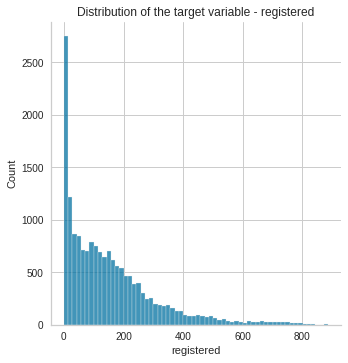

In [17]:
sns.displot(data=df, x='registered')
plt.title('Distribution of the target variable - registered')
plt.show()

Let's see the shape after transformation

Text(0.5, 1.0, 'Distribution of the target variable - registered after yeo-johnson transf.')

Text(0.5, 8.95999999999999, 'registered')

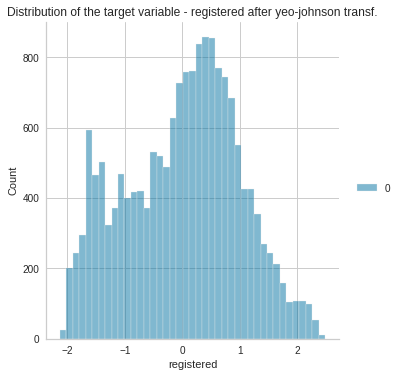

In [18]:
sns.displot(PowerTransformer().fit_transform(df.registered.values.reshape(-1,1)))
plt.title('Distribution of the target variable - registered after yeo-johnson transf.')
plt.xlabel('registered')
plt.show()

Looks much better

## Independent variables

Fist of all let's make a new variable - day of the month

In [19]:
df['day'] = df.dteday.dt.day

#### Distribution and dependences

Text(0.5, 0.98, 'Distribution of the independent variables')

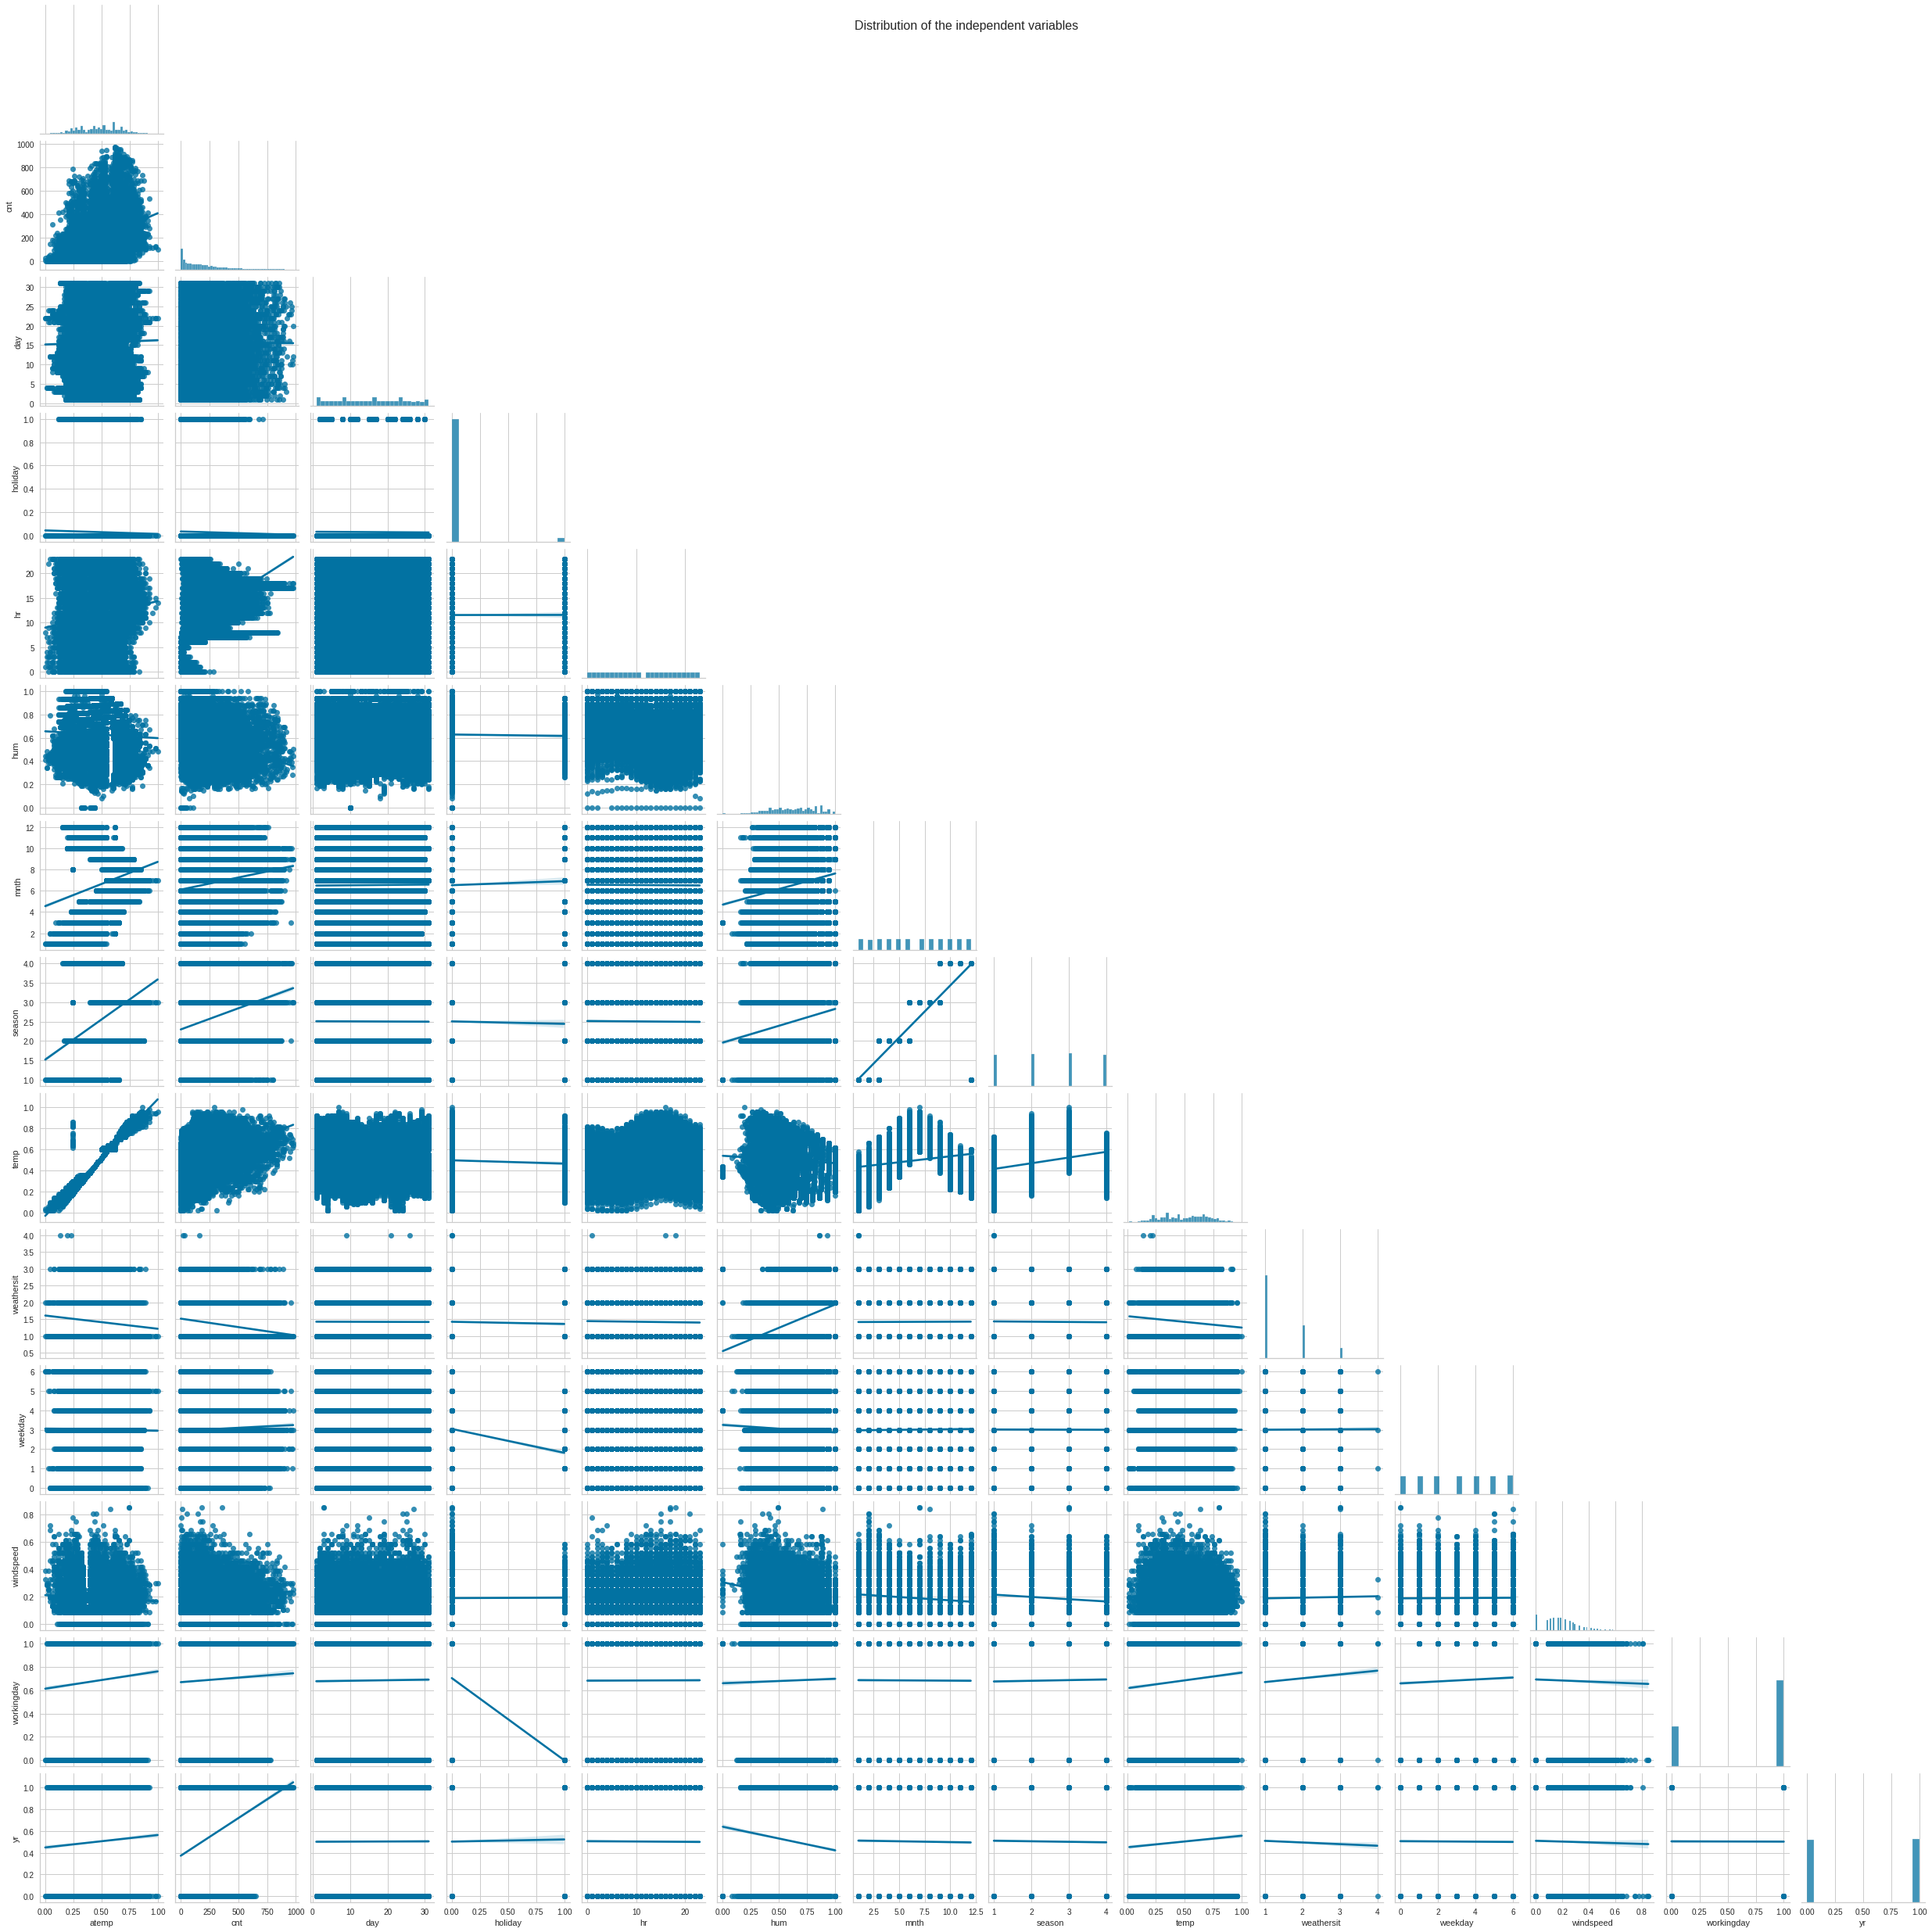

In [20]:
sns.pairplot(df[df.columns.difference(['casual', 'registered'])], corner=True, 
             kind='reg')
plt.suptitle('Distribution of the independent variables', fontsize=16)
plt.show()

The most important features are from the corr plot in profiling report: `hum`, `temp`, `atemp`, `hr`, `mnth` and from the graphs we can see that `hr`, `mnth`, `season`, `temp`. `atemp` and `yr` are important. I would split by `yr` variable because we need to predict feature rentals, and this varible will mess with the analysis if not accounted properly. 

#### Correlations

Let's look at the spearman's correlations between variables. 

<AxesSubplot:>

Text(0.5, 1.0, 'Spearmans corr')

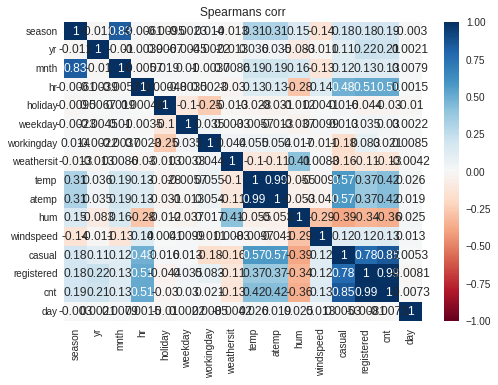

In [21]:
corr_table = df.corr(method='spearman')
sns.heatmap(corr_table, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Spearmans corr')
plt.show()

We can see here:

* Target variable has perfect correlation with `PT08.S2(NMHC)`: (titania) hourly averaged sensor response (nominally NMHC targeted). Because Benzene is NMHC, it would be reasonable to exclude this variable from analysis all together, otherwise it is not interesting =). But unfortunately I don't have much time now to read research papers, so I will exclude this column from my regression analysis. 

* A lot of independent variables have strong correlations between each other, which I will try to solve using PCA and elastic net regression. 

## Final features

In [22]:
trans_cols = ['hum', 'windspeed']
num_cols = list(df.columns.difference(['hum', 'windspeed', 'cnt', 'casual', 
                                 'registered', 'dteday']))
print(num_cols)

['atemp', 'day', 'holiday', 'hr', 'mnth', 'season', 'temp', 'weathersit', 'weekday', 'workingday', 'yr']


## PCA

Let's see how variance is concentrated


array([[-14.73838289,  11.48209449,   5.71175058,  -3.02887743],
       [-14.73524978,  10.48220565,   5.70809184,  -3.02999429],
       [-14.73209244,   9.48226733,   5.70394946,  -3.03104735],
       ...,
       [ 15.36556735,  -9.38631974,  -4.82969052,   2.01728495],
       [ 15.3687046 , -10.38654472,  -4.83378209,   2.01611658],
       [ 15.37191174, -11.38578691,  -4.83871995,   2.01541563]])

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

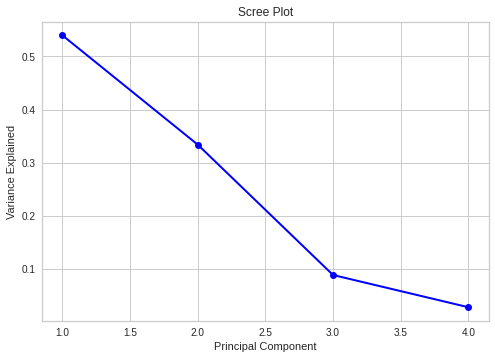

In [23]:
X_pca = df.drop(['cnt', 'casual', 'registered', 'dteday'], axis=1)
pca = PCA(n_components=0.99)
pca.fit_transform(X_pca)

PCA_values = np.arange(pca.n_components_) + 1
plt.plot(PCA_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can see that the varince is quite tightly packed in few components and we probably will benefit from regularization. 

## Visualising the data

In [24]:
tsne = TSNE(n_components=3)
transformed_tsne = tsne.fit_transform(X_pca)

In [25]:
fig = px.scatter_3d(
    transformed_tsne, x=1, y=0, z=2,
    color=df.cnt, labels={'color': 'cnt'}
)
#fig.update_traces(marker_size=1)
fig.show()

Looks cool =) We can see some separation though

# Modelling 1

the target variable is `cnt`, no time series splitting

## Splitting

In [26]:
y = df['cnt']
X = df.drop(['cnt', 'casual', 'registered', 'dteday'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

pow_1 = PowerTransformer(method='box-cox')
y_train = pow_1.fit_transform(y_train.values.reshape(-1,1))
y_test = pow_1.transform(y_test.values.reshape(-1,1))

## Preprocessor pipeline

 After log transformation I'm using `MinMaxScaler`  because of outliers as a more robust technique

In [27]:
print('Shape before the transformation:')
print(X_train.shape)
print(X_test.shape)
print(X_train.columns)

trans_pipeline = Pipeline([
    ('transform', PowerTransformer()),
    ('scaler', MinMaxScaler()),
])

num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
      ('cat', trans_pipeline, trans_cols),
      ('num', num_pipeline, num_cols),
    
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])


X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

print('Shape after the transformation:')
print(X_train_tr.shape)
print(X_test_tr.shape)

Shape before the transformation:
(14772, 13)
(2607, 13)
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day'],
      dtype='object')
Shape after the transformation:
(14772, 13)
(2607, 13)


## Model evaluation function

For my model evaluation I've chosen two the most popular metrics:
* MAE because it was said so in HW instructions =))
* r2 is explained variance and it's easy to compare

In [28]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, cv):
  
  scorers = {
              'mae': make_scorer(mean_absolute_error, greater_is_better=True),
              'r2': make_scorer(r2_score, greater_is_better=True),
            }

  results = cross_validate(estimator=pipeline, X=X_train, y=y_train, cv=cv, scoring=scorers['mae'], return_train_score=True, error_score="raise")

  ppl = pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  train_score = results['train_score']
  val_score = results['test_score']

  print(f'\nTrain: {train_score.mean():.3f}, Std: {train_score.std():.3f}')
  print(f'Validation: {val_score.mean():.3f}, Std: {val_score.std():.3f}')
  print(f'Test: {mean_absolute_error(y_test, y_pred):.3f}')

  return pipeline

## Baseline model

Let's make a baseline model

In [29]:
model = LinearRegression()

ppl_base = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(3)),
    ('model', model)
])

ppl_base = evaluate_model(ppl_base, X_train, y_train, X_test, y_test, 5)



Train: 0.392, Std: 0.001
Validation: 0.409, Std: 0.003
Test: 0.413


Looks alright for a baseline model

## Linear model with regularization

In [30]:
%%time 

def objective(space):
    params = {
        'alpha': round(space['alpha'], 2),
        'l1_ratio': round(space['l1_ratio'], 2),
    }
    
    clf = ElasticNet(
        random_state=42,
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        PolynomialFeatures(3),
        clf,
    )    

    score = cross_val_score(ppl, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean()
    print("score {:.3f} params {}".format(np.abs(score), params))
    return {'loss': np.abs(score), 'status': STATUS_OK }

space = {
      'alpha': hp.uniform('alpha', 0, 1),
      'l1_ratio': hp.uniform('l1_ratio', 0, 1),
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)'''

CPU times: user 58 µs, sys: 441 µs, total: 499 µs
Wall time: 254 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)'

the best score was: score 0.611 params {'alpha': 0.26, 'l1_ratio': 0.03} which is worse than baseline model

In [31]:
model = ElasticNet(alpha=0.26, l1_ratio=0.03)

ppl_base = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(3)),
    ('model', model)
])

ppl_base = evaluate_model(ppl_base, X_train, y_train, X_test, y_test, 5)


Train: 0.610, Std: 0.001
Validation: 0.611, Std: 0.005
Test: 0.605


I was wrong about the regularization effect =))

## KNN Regression

In [32]:
%%time 

def objective(space):

    params = space
    
    clf = KNeighborsRegressor(
        **params
    )

    ppl = make_pipeline(
        preprocessor,
#        PolynomialFeatures(3),
        clf,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=5, error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
      'n_neighbors': hp.choice('n_neighbors',[2, 4, 6, 8, 10]),
      'weights':  hp.choice('weights',['uniform', 'distance']),
      'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
      'metric': hp.choice('metric', ['euclidean', 'l1', 'l2']), 
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)'''

CPU times: user 3.18 ms, sys: 5.96 ms, total: 9.15 ms
Wall time: 4.58 ms


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)'

Best model:

In [33]:
clf = KNeighborsRegressor(algorithm='kd_tree', metric='l2', n_neighbors=4, weights='distance')

ppl_knn = Pipeline([
    ('preprocessor', preprocessor),
#    ('poly', PolynomialFeatures(2)),
    ('model', clf)
])

ppl_knn = evaluate_model(ppl_knn, X_train, y_train, X_test, y_test, 3)



Train: 0.000, Std: 0.000
Validation: 0.407, Std: 0.007
Test: 0.363


Polynomial features did not improved the score. The KNN regressor performed better than baseline model

## Decision Tree Regressor

In [34]:
%%time 

def objective(space):

    params = space
    
    clf = DecisionTreeRegressor(
        criterion='absolute_error',
        random_state=42,
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        clf,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=5, error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
      'splitter': hp.choice('splitter',['best', 'random']),
      'max_depth':  hp.choice('max_depth',[None, 5, 10, 15, 20, 30, 50, 100, 400]),
      'min_samples_split': hp.choice('min_samples_split', [2, 4, 6]),
      'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 3, 4]), 
      'max_features': hp.choice ('max_features', ['auto', 'sqrt', 'log2', 0.4, 0.6, 0.8, 1]),
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)'''

CPU times: user 538 µs, sys: 0 ns, total: 538 µs
Wall time: 544 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)'

The best model:

In [35]:
clf = DecisionTreeRegressor(max_depth=400, max_features='auto',
    min_samples_leaf=4, min_samples_split=2)

ppl_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(2)),
    ('model', clf)
])

ppl_dt = evaluate_model(ppl_dt, X_train, y_train, X_test, y_test, 3)


Train: 0.085, Std: 0.001
Validation: 0.203, Std: 0.002
Test: 0.184


We can see some overfitting here, but result anyway is the best so far

## Random Forest Regressor

In [36]:
%%time 

def objective(space):

    params = space
    
    clf = RandomForestRegressor(
        criterion='absolute_error',
        random_state=42,
        n_jobs=-1,
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        clf,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=5, error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
#      'n_estimators': hp.choice('n_estimators', [100, 200, 300, 500, 1000]),
      'max_depth':  hp.choice('max_depth', [None, 5, 10, 15]),
      'min_samples_split': hp.choice('min_samples_split', [2, 4, 6]),
      'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 3, 4]), 
      'max_features': hp.choice ('max_features', ['auto', 'sqrt', 'log2', 0.4, 0.6, 0.8, 1]),
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)'''

CPU times: user 210 µs, sys: 2 µs, total: 212 µs
Wall time: 215 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)'

I was tired to wait, so consider the best model the second one:

In [37]:
#{'max_depth': None, 'max_features': 0.6, 'min_samples_leaf': 3, 'min_samples_split': 2}

clf = RandomForestRegressor(n_jobs=-1, max_features=0.6, min_samples_leaf=3, min_samples_split=2)

ppl_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(2)),
    ('model', clf)
])

ppl_rf = evaluate_model(ppl_rf, X_train, y_train, X_test, y_test, 3)


Train: 0.079, Std: 0.000
Validation: 0.151, Std: 0.001
Test: 0.143


The best so far

## SVM Regressor

In [38]:
%%time 

def objective(space):

    params = space
    
    clf = SVR(
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        clf,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=5, error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
      'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
      'gamma':  hp.choice('gamma', ['scale', 'auto']),
#      'C': hp.uniform('C', 0, 10),
#      'epsilon': hp.uniform('epsilon', 0.001, 1)
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)'''

CPU times: user 192 µs, sys: 2 µs, total: 194 µs
Wall time: 198 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=20)'

Very unstable and bad result, so far the best model:

In [39]:
#{'gamma': 'scale', 'kernel': 'rbf'}

clf = SVR(gamma='scale')

ppl_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(2)),
    ('model', clf)
])

ppl_svr = evaluate_model(ppl_svr, X_train, y_train, X_test, y_test, 3)


Train: 0.384, Std: 0.001
Validation: 0.405, Std: 0.004
Test: 0.400


almost the same performance as the baseline model

## Catboost Regressor

In [40]:
#from google.colab import output
#output.enable_custom_widget_manager()

In [41]:
%%time 

def objective(space):

    params = space
    
    clf = CatBoostRegressor(
        verbose=False,
        loss_function='MAE',
        iterations=1000,
        random_seed=42,
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        clf,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=5, error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
      'depth': hp.choice('depth', [None, 5, 10, 12]),
      'min_data_in_leaf':  hp.choice('min_data_in_leaf', [1, 2, 3]),
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)'''

CPU times: user 235 µs, sys: 0 ns, total: 235 µs
Wall time: 243 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=10)'

The best model:

In [42]:
cat = CatBoostRegressor( 
        verbose=False,
        iterations=1000,
        loss_function='MAE',
        random_seed=42,
        depth=10, 
        min_data_in_leaf=2
    )

ppl_cat = make_pipeline(
    preprocessor,
#    PolynomialFeatures(2),
    cat,
)   

ppl_cat = evaluate_model(ppl_cat, X_train, y_train, X_test, y_test, 3)

#X_test_transformed = pipeline.transform(X_test)
#ppl_cat.fit(X_train, y_train,
#       catboostregressor__eval_set=(X_test_transformed, y_test), catboostregressor__plot=True)


Train: 0.068, Std: 0.000
Validation: 0.128, Std: 0.002
Test: 0.123


The best model, going to use it for the rest of HW. Polynomial features improve very little but make process significantly slower, so I decided skip it. 

## Feature importances

<AxesSubplot:>

Text(0.5, 1.0, 'Feature importances')

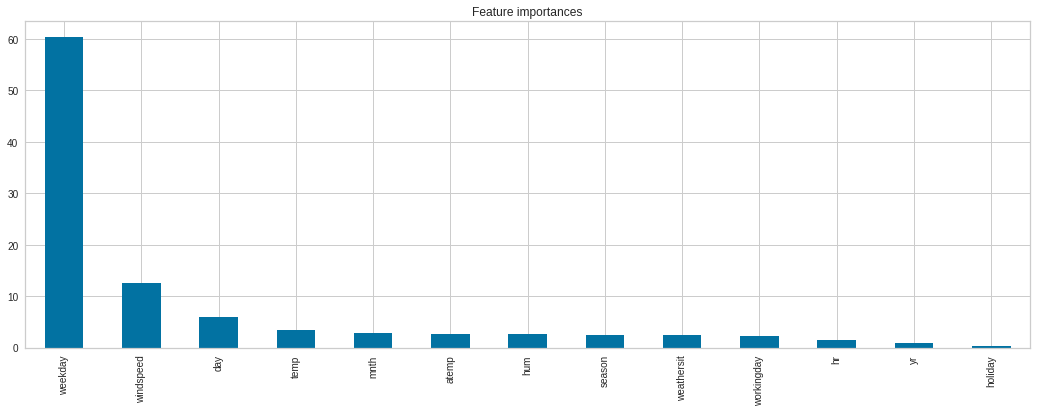

In [43]:
feature_importance = pd.Series(index = X_train.columns, data = ppl_cat.named_steps['catboostregressor'].get_feature_importance())

feature_importance.sort_values(ascending=False).plot(kind = 'bar', figsize = (18,6))
plt.title('Feature importances')

We can see that the most important feature is the `weekday`, `windspeed` and `day`

In [44]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 13.0 MB/s eta 0:00:00


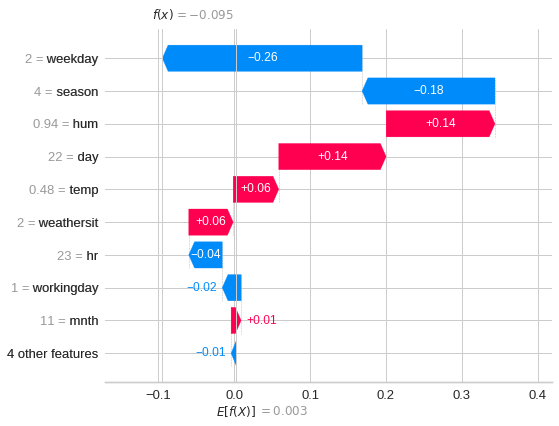

In [45]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(ppl_cat.named_steps['catboostregressor'])
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

## Residual analysis

Let's look at the plot

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

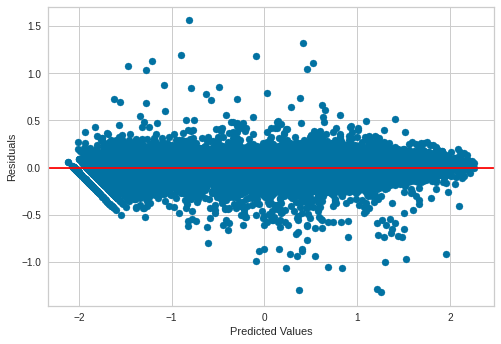

In [47]:
y_pred = ppl_cat.predict(X_train).reshape(-1, 1)
residuals = y_train - y_pred.reshape(-1, 1)
plt.scatter(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.show()

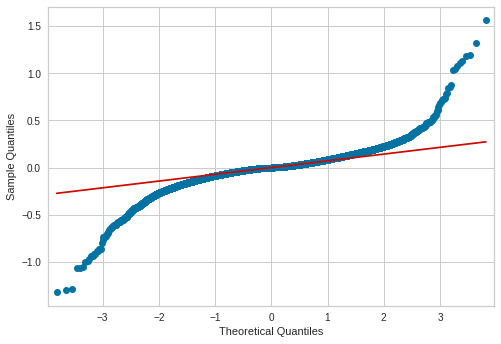

In [48]:
sm.qqplot(np.ravel(residuals), line='q');

I have no idea why there are two identical graphs, but anyway result is not bad, tails are a way off though. We could try to get rid of influential outliers and refit the model. If I will have a time left I will add a section below.

# Modeling 2 - yearly

Our data was collected during two years and in real life we usually interested in predicting future from the past data. So our initial split was totally random without accounting for the time component of the data. lets make a split by years. Let's see the distribution our target variables by year 

<AxesSubplot:xlabel='yr', ylabel='cnt'>

Text(0.5, 1.0, 'cnt by year')

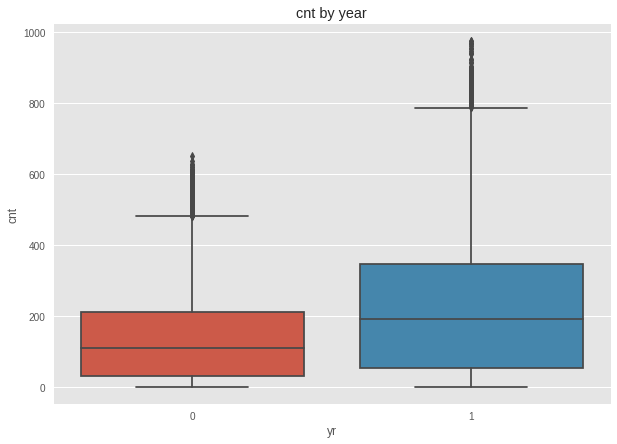

In [ ]:
sns.boxplot(data=df, x='yr', y='cnt')
plt.title('cnt by year')
plt.show()

<AxesSubplot:xlabel='yr', ylabel='casual'>

Text(0.5, 1.0, 'casual by year')

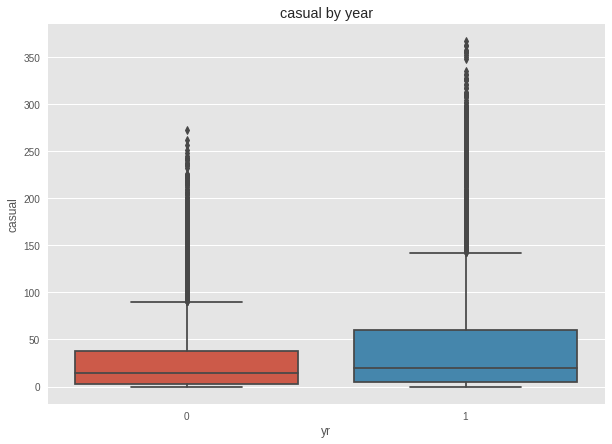

In [ ]:
sns.boxplot(data=df, x='yr', y='casual')
plt.title('casual by year')
plt.show()

<AxesSubplot:xlabel='yr', ylabel='registered'>

Text(0.5, 1.0, 'registered by year')

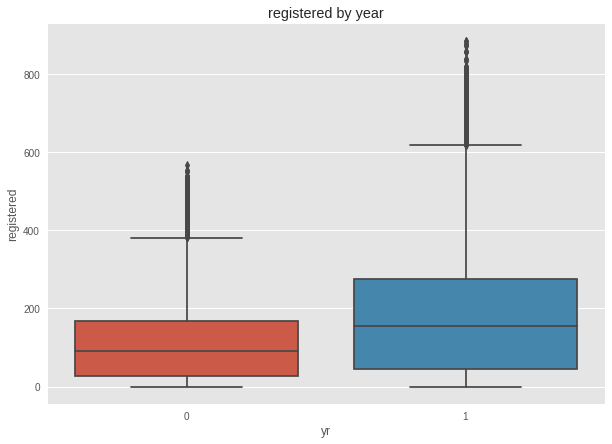

In [ ]:
sns.boxplot(data=df, x='yr', y='registered')
plt.title('registered by year')
plt.show()

We can see that second year is significantly differs from the first one for the all types of rentals. Because of this we can expect that our model will have bigger MAE 

## Splitting

In [ ]:
y = df['cnt']
X = df.drop(['cnt', 'casual', 'registered', 'dteday'], axis=1)

X_train = X[df.yr==0]
X_test = X[df.yr==1]
y_train = y[df.yr==0]
y_test = y[df.yr==1]

pow_1 = PowerTransformer(method='box-cox')
y_train = pow_1.fit_transform(y_train.values.reshape(-1,1))
y_test = pow_1.transform(y_test.values.reshape(-1,1))

## Catboost regressor

In [ ]:
ppl_cat = make_pipeline(
    preprocessor,
    cat,
)  

ppl_cat = evaluate_model(ppl_cat, X_train, y_train, X_test, y_test, 3)


Train: 0.074, Std: 0.001
Validation: 0.297, Std: 0.107
Test: 0.455


We can see here that our model perfomed worse as expected. 

# Modeling 3 - multitarget

Considering the best model, train it on the first year with multitarget (casual, registered) and validate on the second year. Analyze both targets independently. Then use a sum of both targets to predict cnt on the second year. Estimate the quality. Are the results better or worse in comparison with the previous step? Why?


## Splitting 2D

In [ ]:
y_2d = df[['casual', 'registered']]

X_train = X[df.yr==0]
X_test = X[df.yr==1]
y_train_2d = y_2d[df.yr==0]
y_test_2d = y_2d[df.yr==1]

pow_1 = PowerTransformer()
y_train_2d = pow_1.fit_transform(y_train_2d.values)
y_test_2d = pow_1.transform(y_test_2d.values)

## Catboost regressor 2D

Unfortunately I can not optimize CatBoostRegressor for MAE, will use RMSE and evalute on MAE

In [ ]:
cat_multi = CatBoostRegressor( 
        verbose=False,
        iterations=1000,
        loss_function='MultiRMSE',
        random_seed=42,
        depth=10, 
        min_data_in_leaf=2
    )

ppl_cat_multi = make_pipeline(
    preprocessor,
    cat_multi,
)   

ppl_cat_multi.fit(X_train, y_train_2d)

#ppl_cat = evaluate_model(ppl_cat, X_train, y_train, X_test, y_test, 3)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['hum', 'windspeed']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['atemp', 'day', 'holiday',
                                                   'hr', 'mnth', 'season',
                                                   'temp', 'weathersit',
                                                   'weekday', 'workingday',
                                                   'yr'])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fdea8e9f370>)])

In [ ]:
scorers = {
            'mae': make_scorer(mean_absolute_error, greater_is_better=True),
          }

results = cross_validate(estimator=ppl_cat_multi, X=X_train, y=y_train_2d, cv=3,
                         scoring=scorers['mae'], return_train_score=True, 
                         error_score="raise")

y_pred_2d = ppl_cat_multi.predict(X_test)

In [ ]:
train_score = results['train_score']
val_score = results['test_score']

print(f'\nTrain: {train_score.mean():.3f}, Std: {train_score.std():.3f}')
print(f'Validation: {val_score.mean():.3f}, Std: {val_score.std():.3f}')
print(f'Test casual: {mean_absolute_error(y_test_2d[0], y_pred_2d[0]):.3f}')
print(f'Test registered: {mean_absolute_error(y_test_2d[1], y_pred_2d[1]):.3f}')
print(f'Test avg: {mean_absolute_error(y_test_2d, y_pred_2d):.3f}')



Train: 0.104, Std: 0.005
Validation: 0.350, Std: 0.116
Test casual: 0.149
Test registered: 0.821
Test avg: 0.409


We can see that avarage performance is a bit better when we predicting multitarget. But error for `registered` is huge. Let's compare its sum with `cnt` 

## Compare output

<AxesSubplot:>

[[1.         0.98276223]
 [0.98276223 1.        ]]


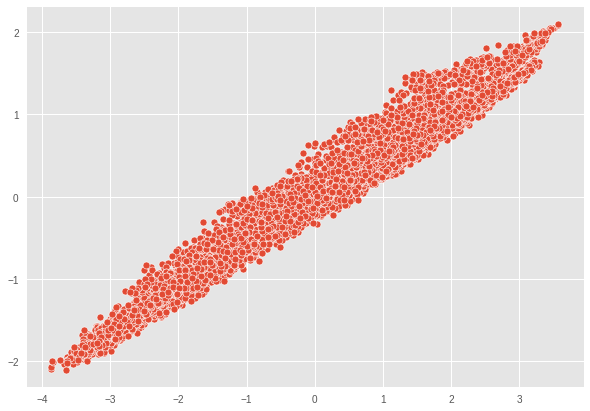

In [ ]:
y_pred_from2d = y_pred_2d[:, 0] + y_pred_2d[:, 1]
y_pred = ppl_cat.predict(X_test)
sns.scatterplot(x=y_pred_from2d, y=y_pred)
print(np.corrcoef(y_pred, y_pred_from2d))

We can see that predictions from 1D model is quite similar to sum from 2D model. 

In [ ]:
print(f'test MAE: {mean_absolute_error(y_test, y_pred_from2d):.3f}')

test MAE: 0.715


But MAE is huge compare to 1D model. Let's try to do stacking models instead of just sum

## Stacking

In [ ]:
X_train_2 = ppl_cat_multi.predict(X_train)
X_test_2 = ppl_cat_multi.predict(X_test)
y_train_2 = df.cnt[df.yr==0]
y_test_2 = df.cnt[df.yr==1]

pow_2 = PowerTransformer()
y_train_2 = pow_2.fit_transform(y_train_2.values.reshape(-1, 1))
y_test_2 = pow_2.transform(y_test_2.values.reshape(-1, 1))

#print(X_train_2[0:10], X_test_2[0:10], y_train_2[0:10], y_test_2[0:10])

sec_model = LinearRegression()

cat_2 = evaluate_model(sec_model, X_train_2, y_train_2, X_test_2, y_test_2, 5)


Train: 0.096, Std: 0.002
Validation: 0.097, Std: 0.007
Test: 0.447


Performance is slightly better than single target regression, the reson why is most probably because of additional information which was derived from the difference between registered and casual renters or simply because of stacking. 

# Conclusion

* What are the most influential features?

https://colab.research.google.com/drive/1vsWdckZij37CrILzbEMaJIDPov_xV-R2#scrollTo=TAICVa-5GG7u&line=4&uniqifier=1

* How the temperature and humidity affect rental count rates?

According to graphs and corr plots dependence between temperature and rentals are linear with spearman's corr coef between `temp` and `cnt` 0.42 - medium positive correlation. Between `hum` and `cnt` is -0.36 - mediun negative correlation. The drier and warmer the weather the more rentals, I personally don't like cycling in winter =))

* What is more important: current season or current hour, temperature or feeling temperature? Why?

Season has higher feature importance then hour, but both of these features have low importances for the model anyway. Temperature has higher importance than feeling temperature, but these features also have low importances and they are highly correlated between each other so this result can be simply because of multicollinearity between features. 


Now let's make a reverse transformation of target and final scores: 

In [ ]:
y_test_orig = df.cnt[df.yr==1]
y_pred_2d = ppl_cat_multi.predict(X_test)
y_pred_1d = cat_2.predict(y_pred_2d)

y_pred_orig = pow_2.inverse_transform(y_pred_1d)

mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
print(f'MAE in original units: {mae_orig:.3f}')
print(f'R2 score: {r2_score(y_test_orig, y_pred_orig):.3f}')

MAE in original units: 90.830
R2 score: 0.617


It's quite big MAE and low R2 score, which is expected after we have splitted by years. 